# Let's talk about high-amplitude variables.

Personal motivation: I've been working hard on (re-)reducing the photometry in 5 star forming regions (Cyg OB7, ONC, NGC 1333, IC348, and Mon R2) and I'd like to ensure that my reduction is publishable. I want to include all 5 regions, and for the scientific analysis to be *very easy* so that it does not drag out at all.

Science motivation: There are certain kinds of variable stars that are relatively quiescent for long periods of time but then undergo large swings in brightness. It would be valuable to catalog where we find them!

Especially in the age of deep, high-cadence all-sky (or large-sky) optical surveys such as TESS, K2, Gaia, Pan-STARRS, LSST, VISTA... this kind of science will have lots of advances in this decade.  And we're sitting on some valuable data ourselves.

# What I did here

Among the 5 WFCAM/UKIRT monitoring programs, I have (a) computed variability statistics, (b) separated stars into data quality bins based on their photometric error processing flags and other metadata, and (c) identified stars which 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [32]:
from wuvars.data.spreadsheet import v1 as spread
from wuvars.data.photometry import v1 as phot
from wuvars.data.photometry import v1_grouped as phot_grouped

from wuvars.analysis.variability_selection import sq0, sq1, sq2, sq0_variables, sq1_variables, sq2_variables

Loading WSERV1 photometry data... Grouping... DONE (elapsed time: 34.98s)
Loading WSERV5 photometry data... Grouping... DONE (elapsed time: 3.13s)
Loading WSERV7 photometry data... Grouping... DONE (elapsed time: 2.91s)
Loading WSERV8 photometry data... Grouping... DONE (elapsed time: 2.00s)
Loading WSERV11 photometry data... Grouping... DONE (elapsed time: 3.55s)


In [4]:
wserv_ids = [1, 5, 7, 8, 11]

# n_obs_list = [130, 120, 171, 85, 110]

n_min_list = [60, 35, 80, 55, 65]
n_max_list = [100, 90, 160, 80, 100]

min_Stetson_list = [2, 3, 1.6, 1.6, 4]

SFR_names = ["Cyg OB7", "Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

Cyg OB7              has 23 high-amplitude variables (>0.6 mag)
Orion Nebula Cluster has 18 high-amplitude variables (>0.6 mag)
NGC 1333             has 3 high-amplitude variables (>0.6 mag)
IC 348               has 4 high-amplitude variables (>0.6 mag)
Mon R2               has 16 high-amplitude variables (>0.6 mag)


Text(0, 0.5, 'K variability amplitude (90-10 range)')

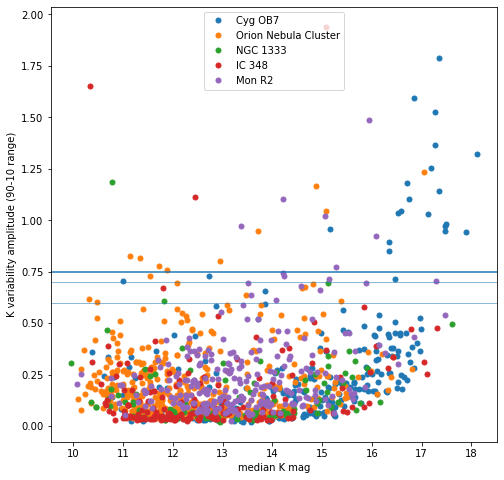

In [65]:
fig, ax = plt.subplots(figsize=(8,8))

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    ds = spread[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    x_array = ds['median']['KAPERMAG3'][v1]
    y_array = ds['range_9010']['KAPERMAG3'][v1]
    
    plt.plot(x_array, y_array, 'o', ms=5, label=SFR_dict[wserv])
    
    hi_amp = 0.6
    
    print(f"{SFR_dict[wserv]:20s} has {np.sum(y_array>hi_amp)} high-amplitude variables (>{hi_amp} mag)")

plt.legend(loc='upper center')
ax.axhline(0.75)
ax.axhline(0.7, lw=0.5)
ax.axhline(0.6, lw=0.5)
plt.xlabel("median K mag")
plt.ylabel("K variability amplitude (90-10 range)")







WSERV1 has 19 high-amplitude variables (>1.0 mag)


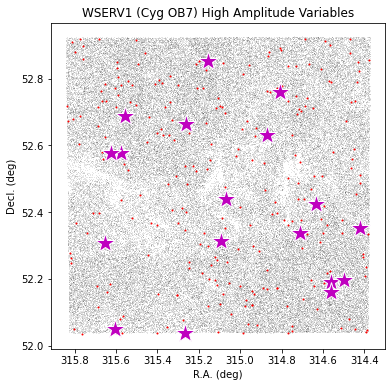

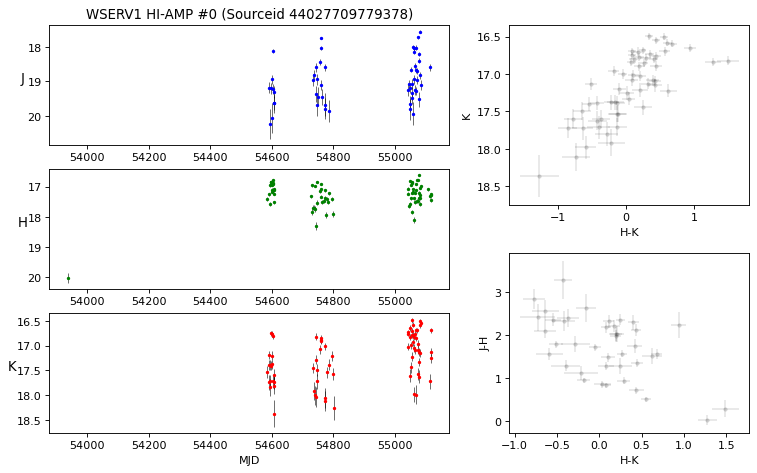

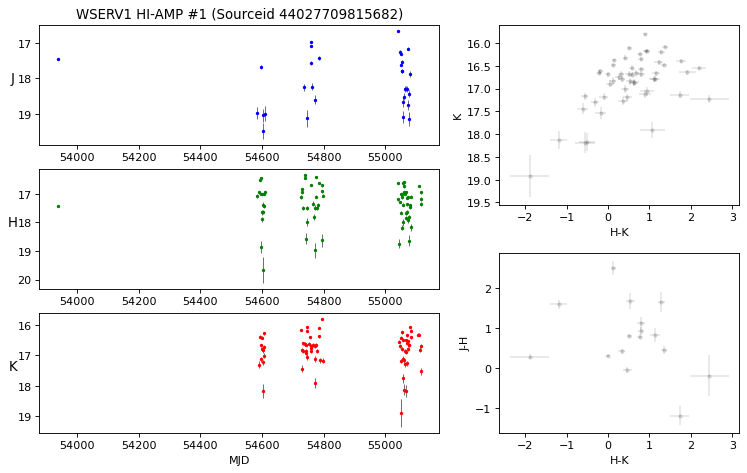

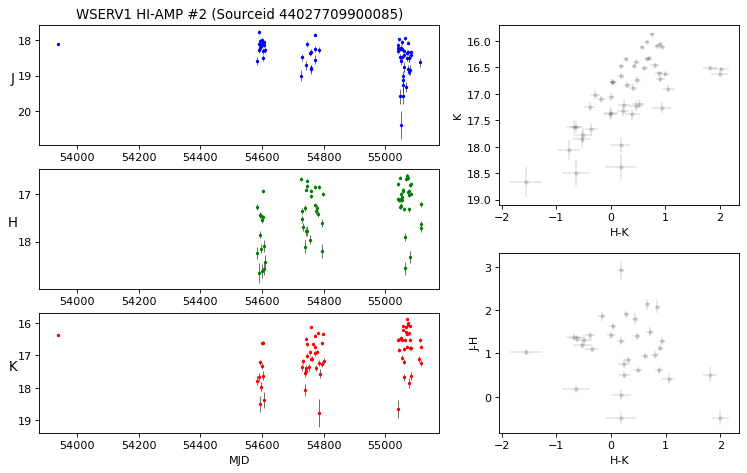

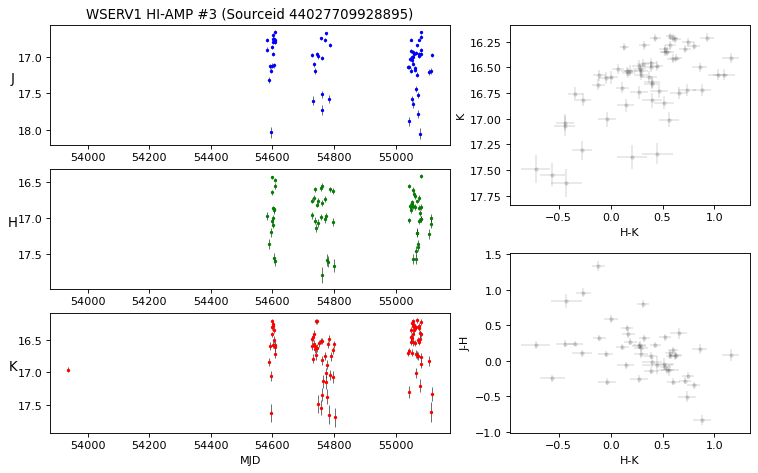

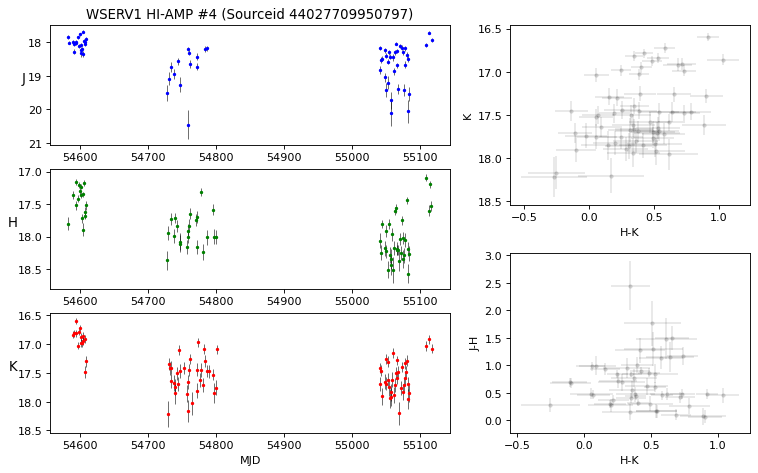

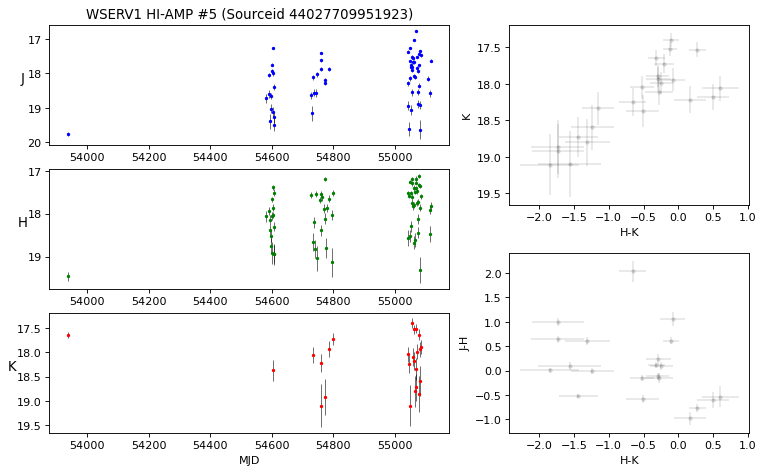

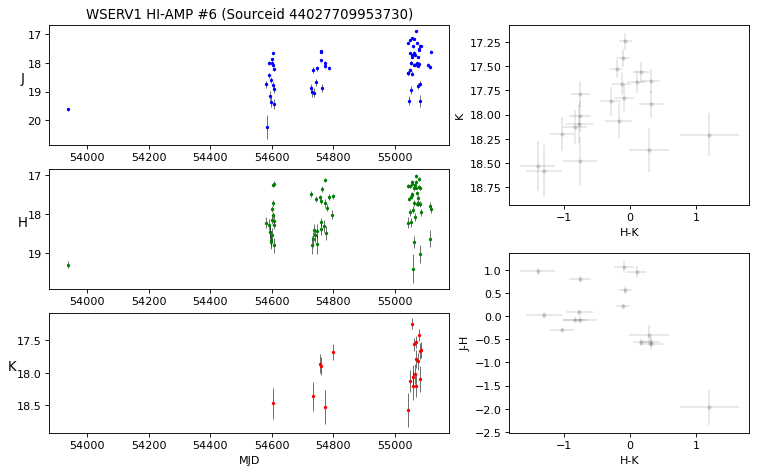

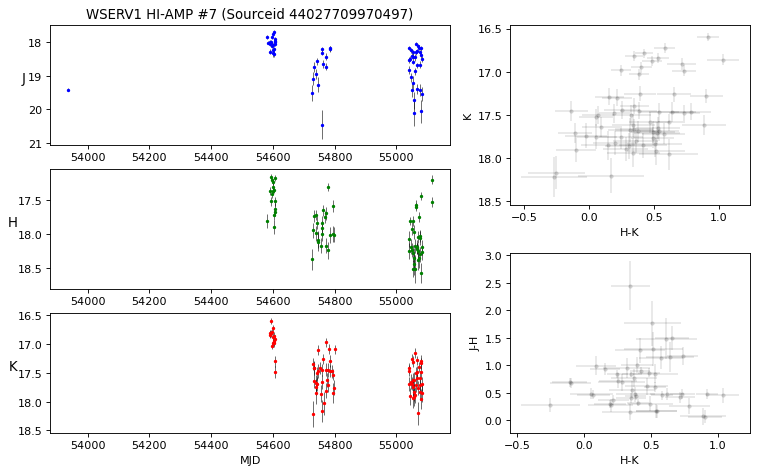

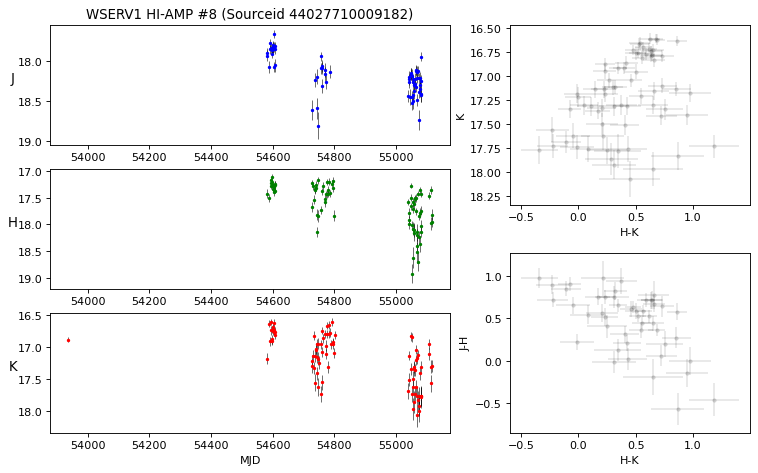

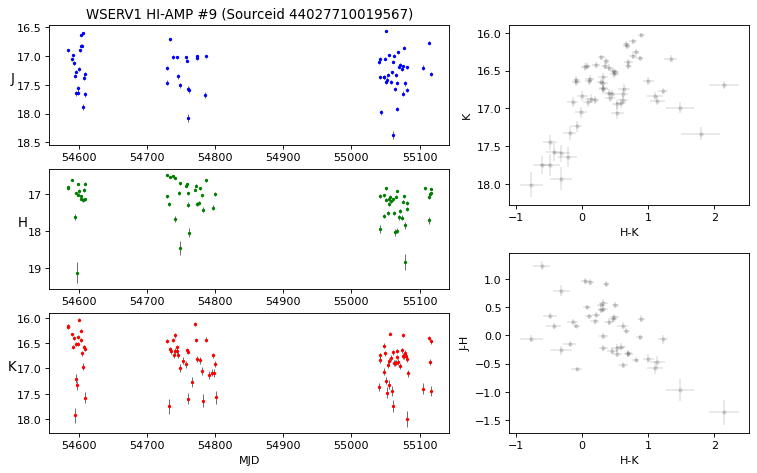

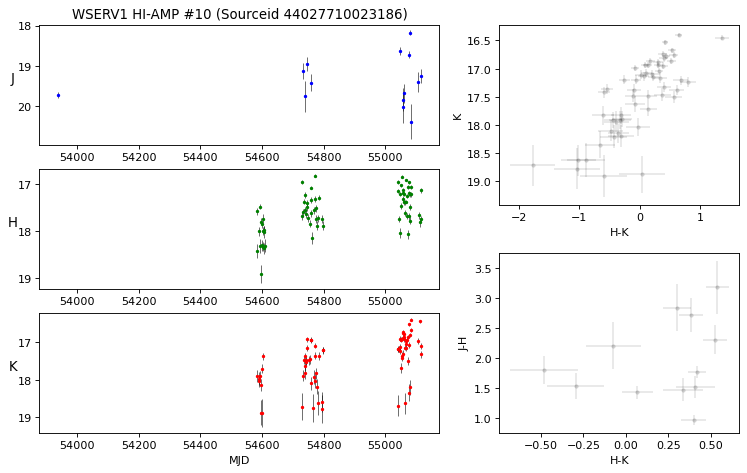

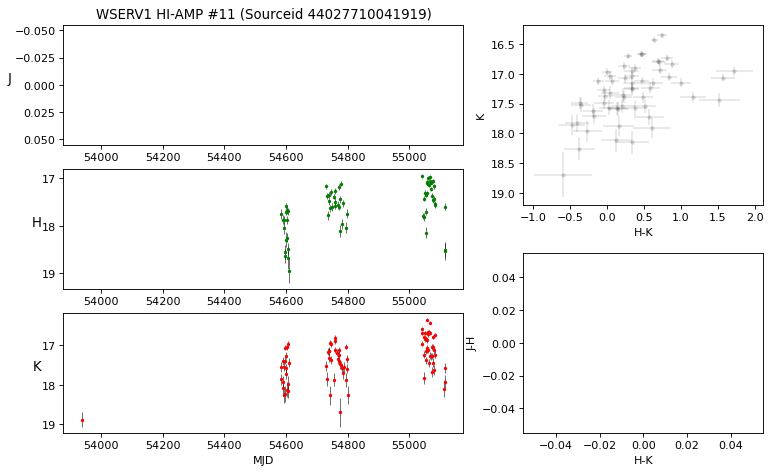

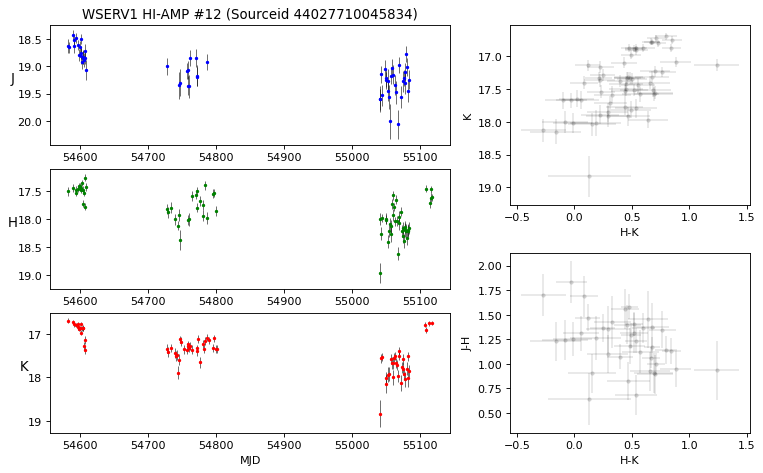

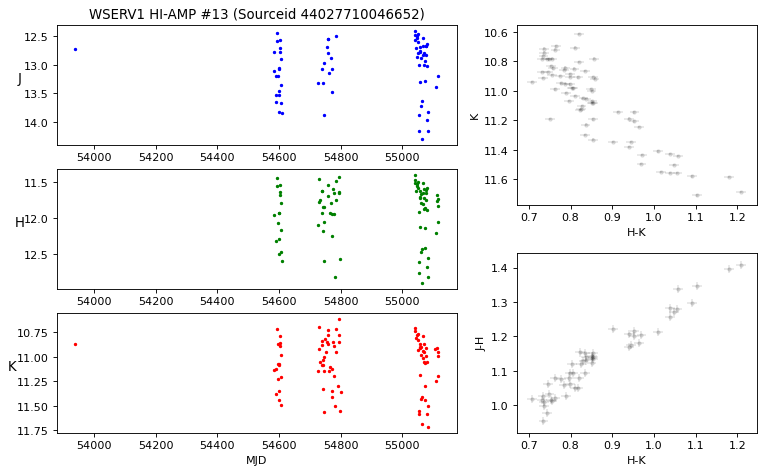

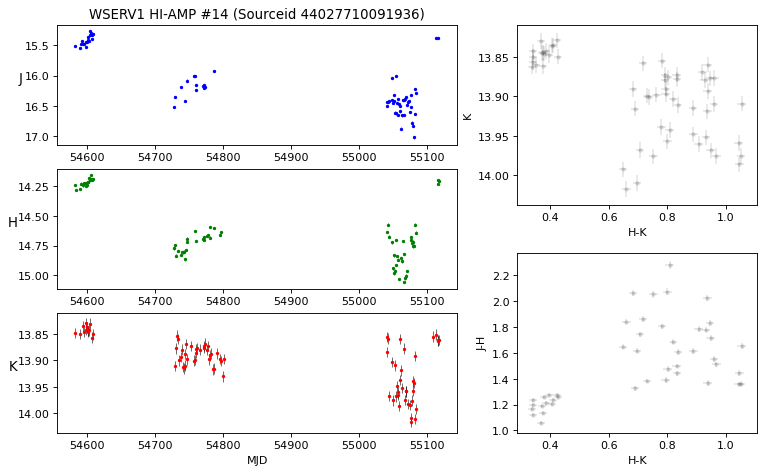

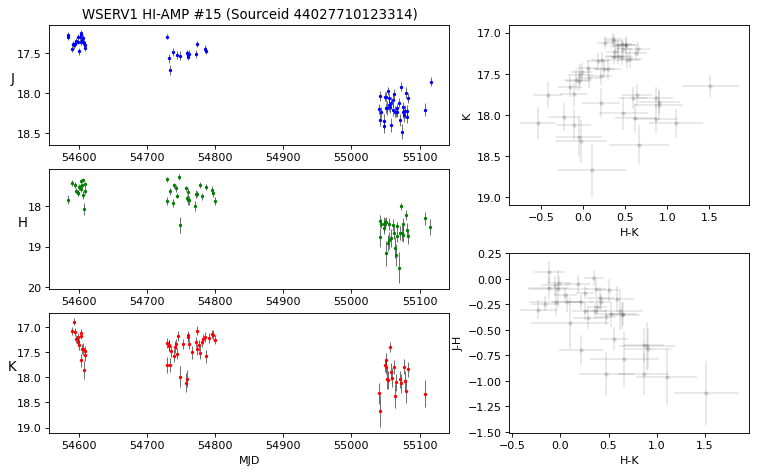

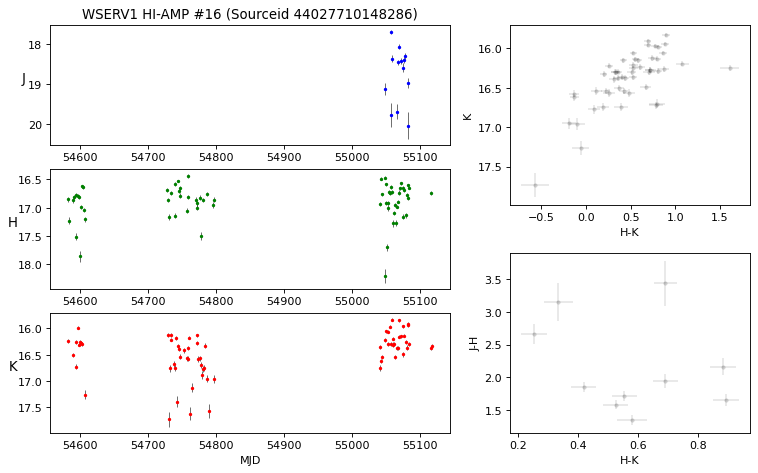

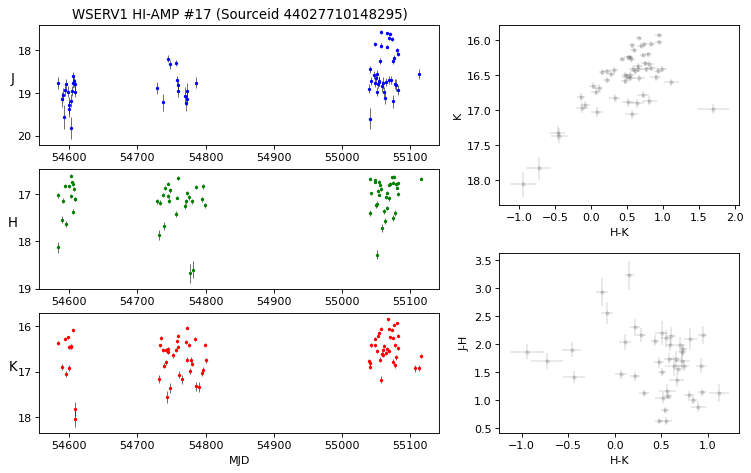

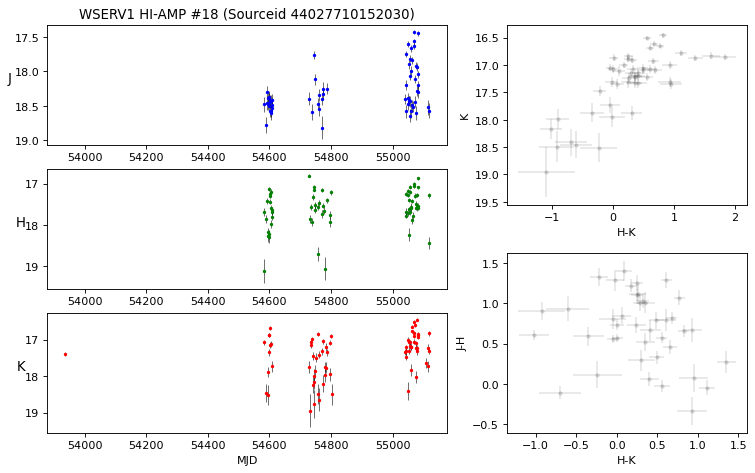







WSERV5 has 14 high-amplitude variables (>1.0 mag)


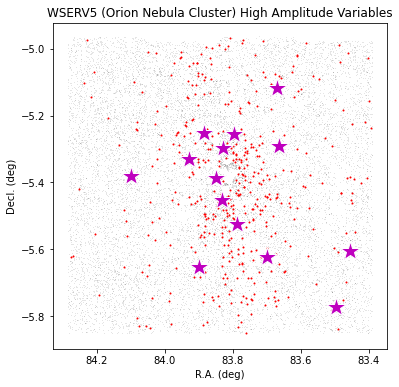

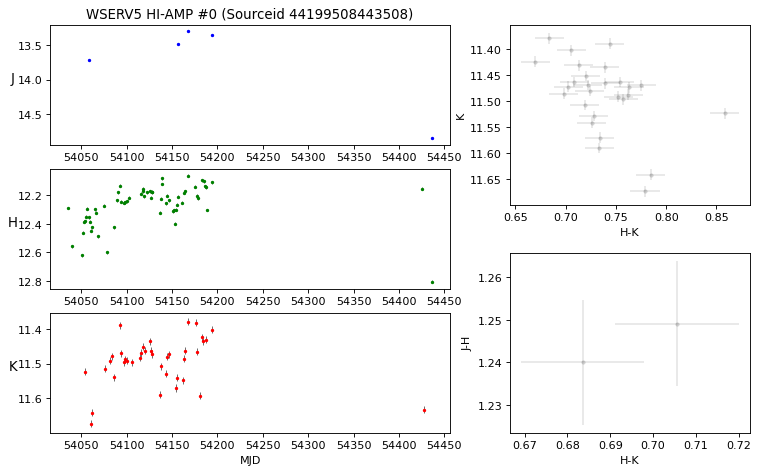

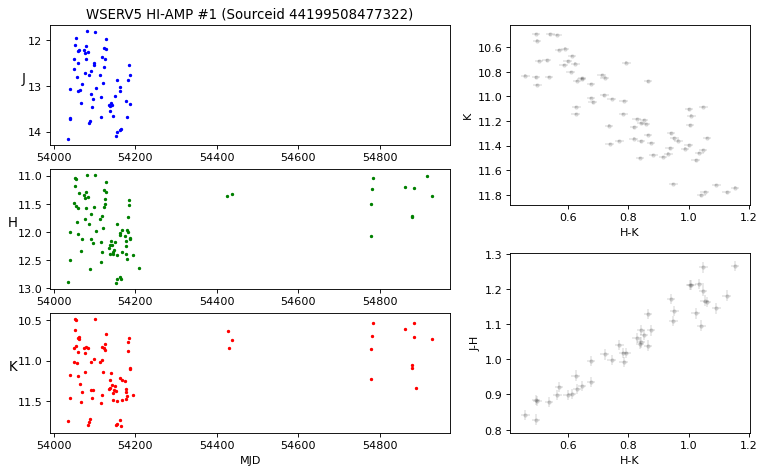

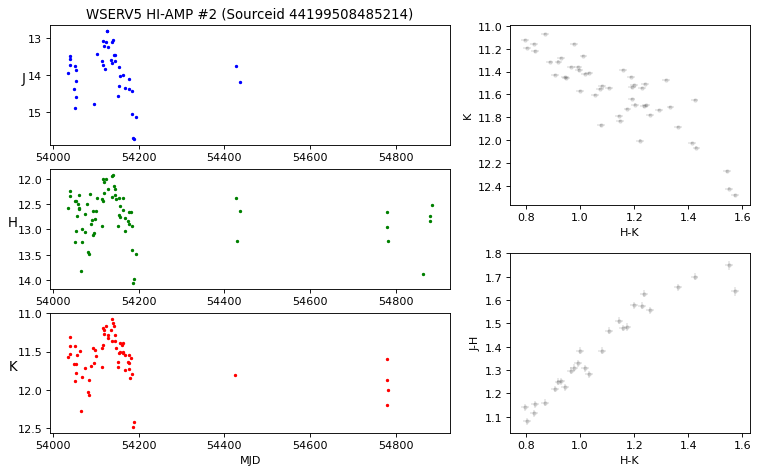

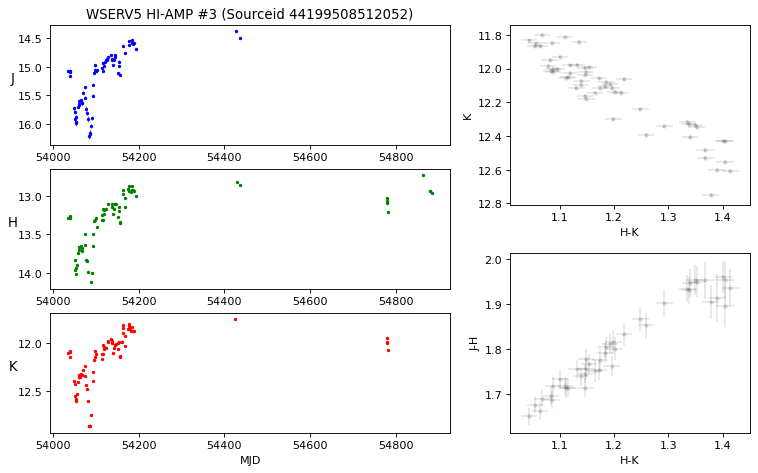

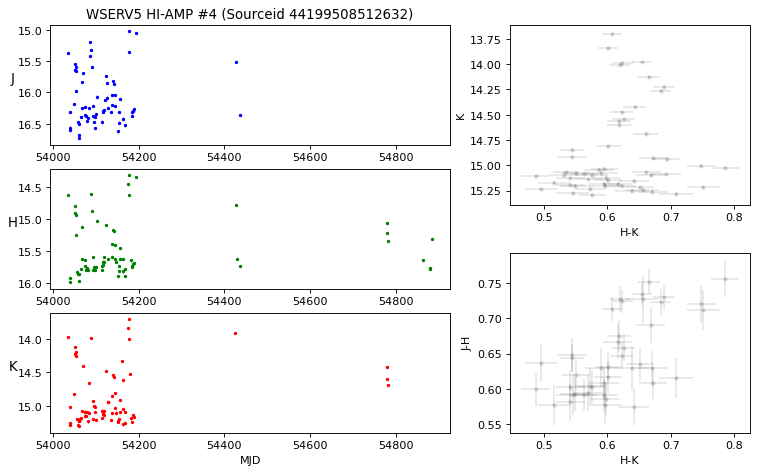

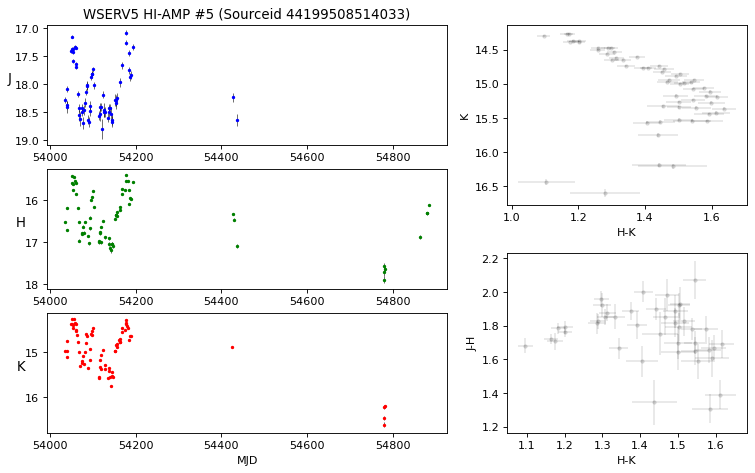

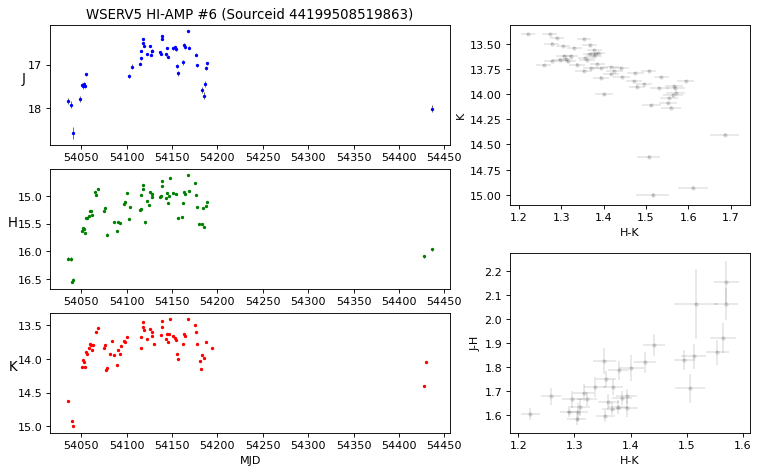

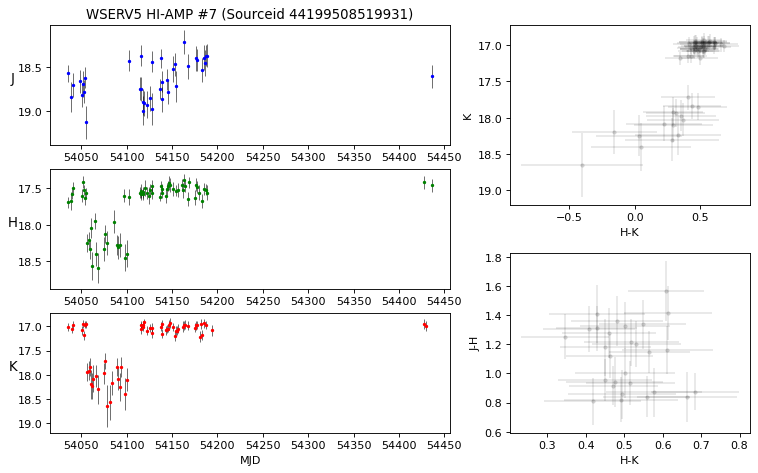

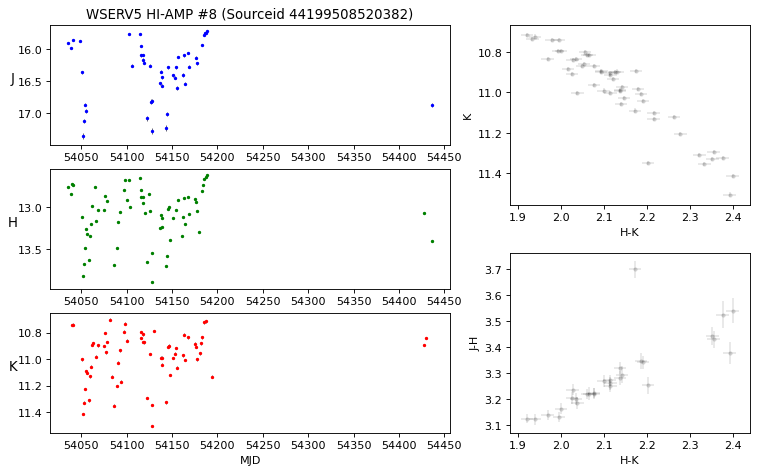

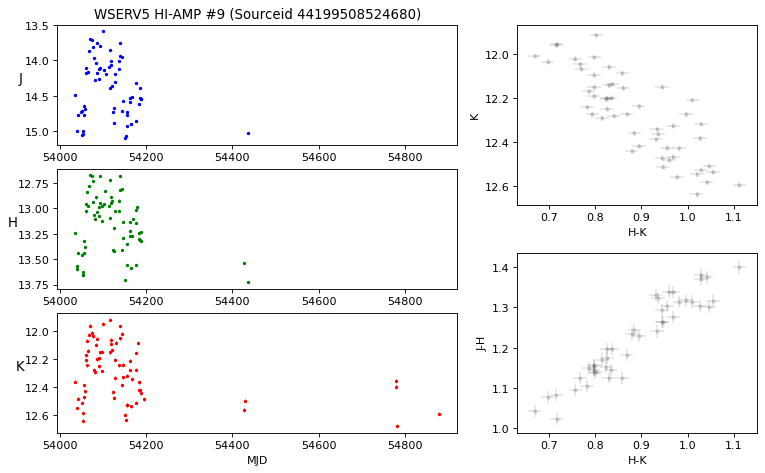

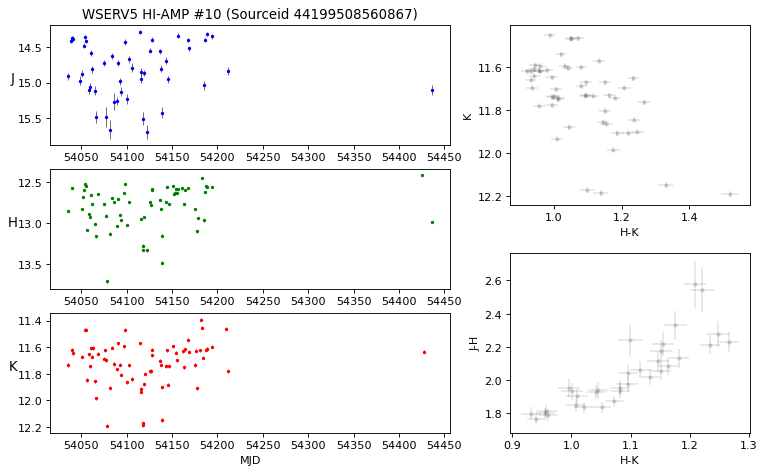

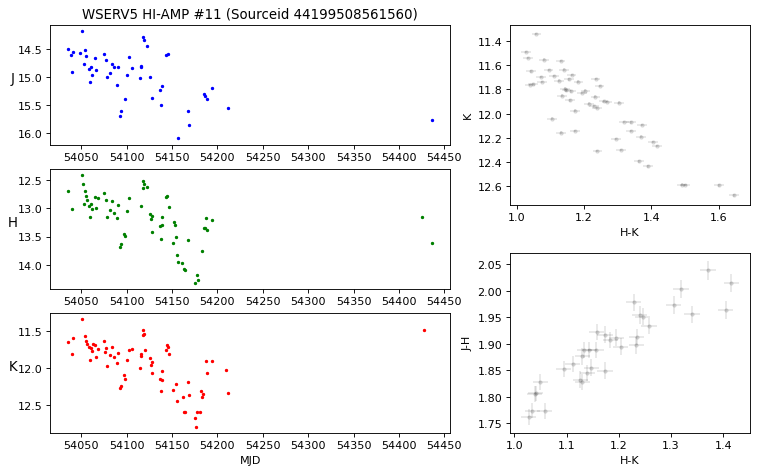

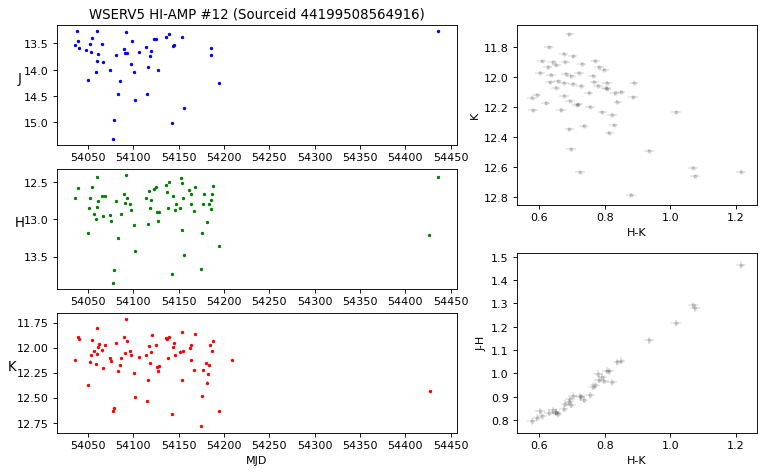

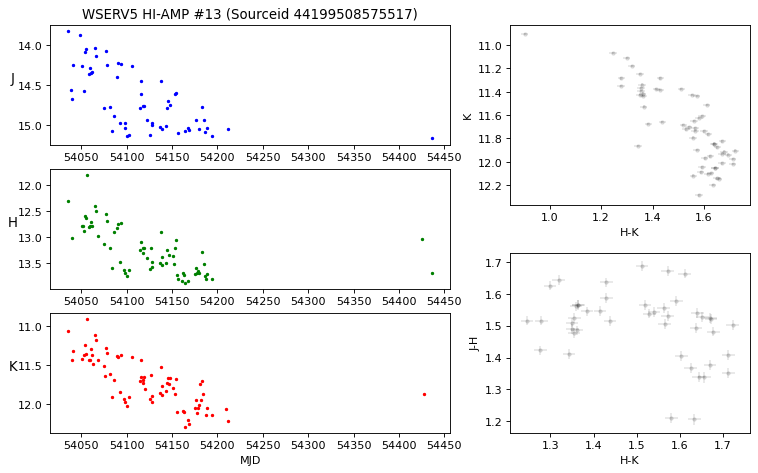







WSERV7 has 1 high-amplitude variables (>1.0 mag)


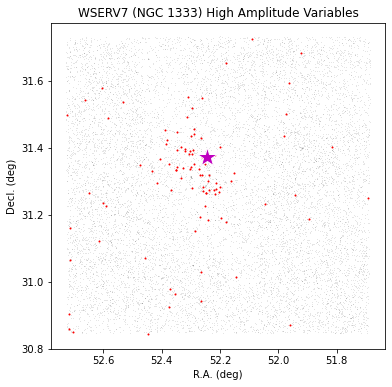

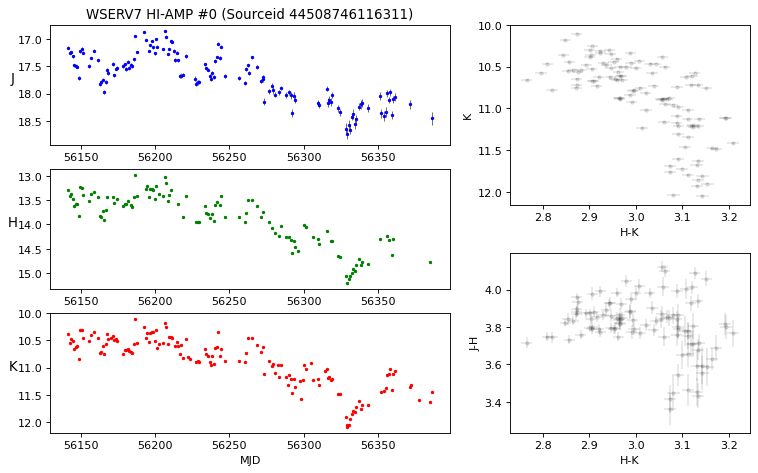







WSERV8 has 4 high-amplitude variables (>1.0 mag)


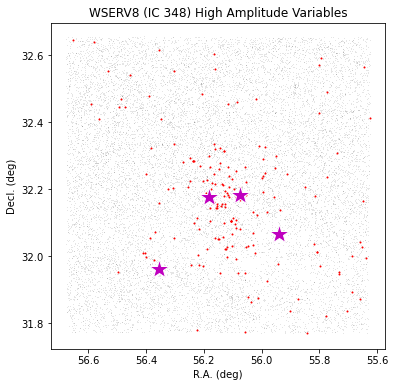

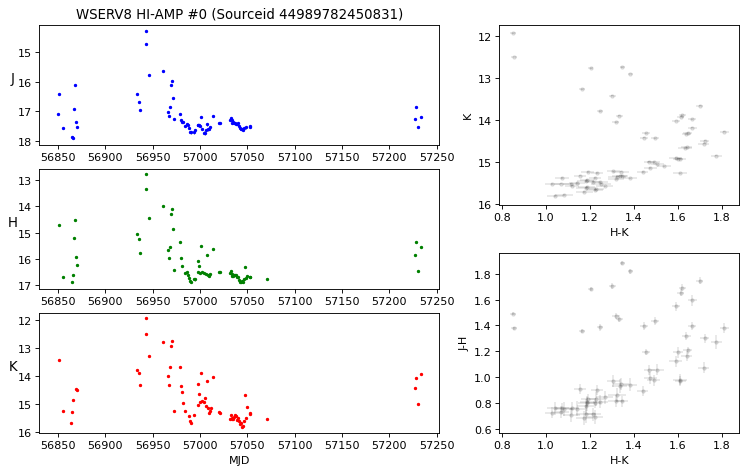

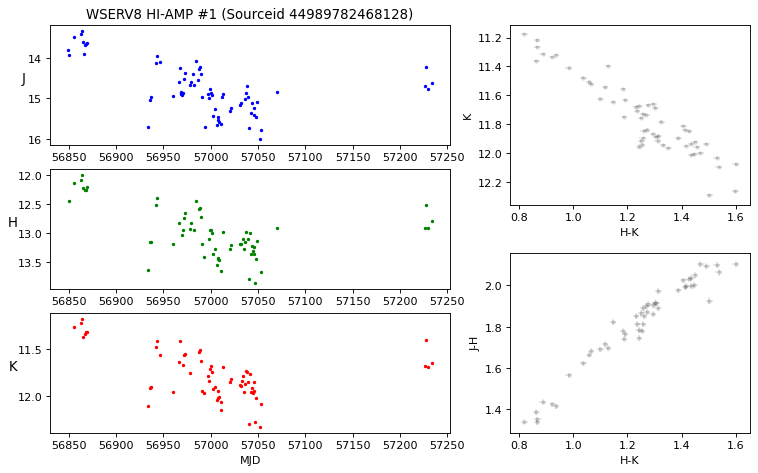

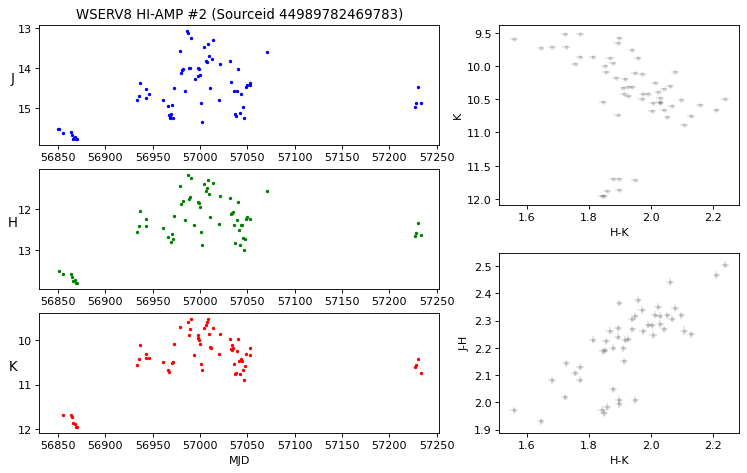

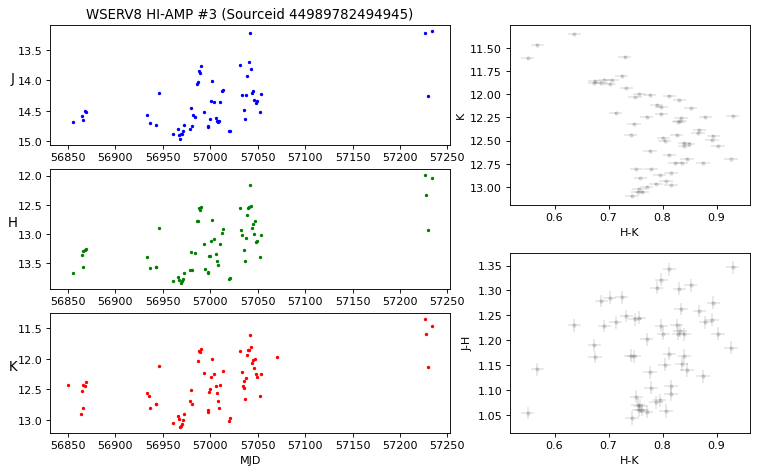







WSERV11 has 15 high-amplitude variables (>1.0 mag)


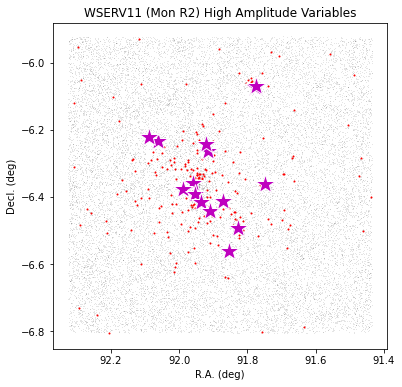

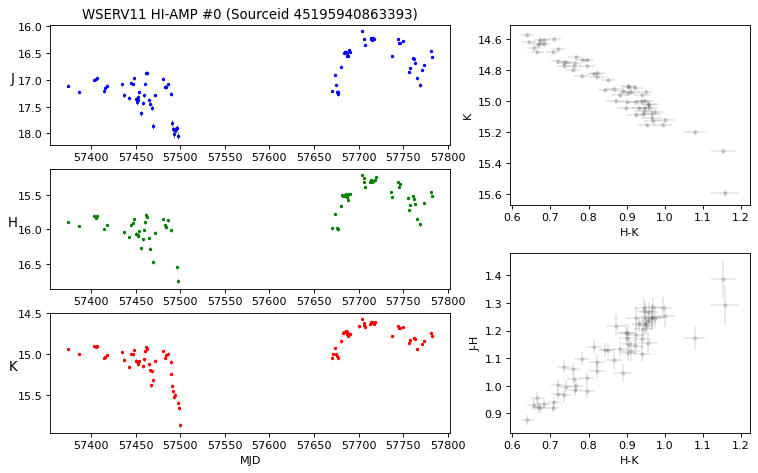

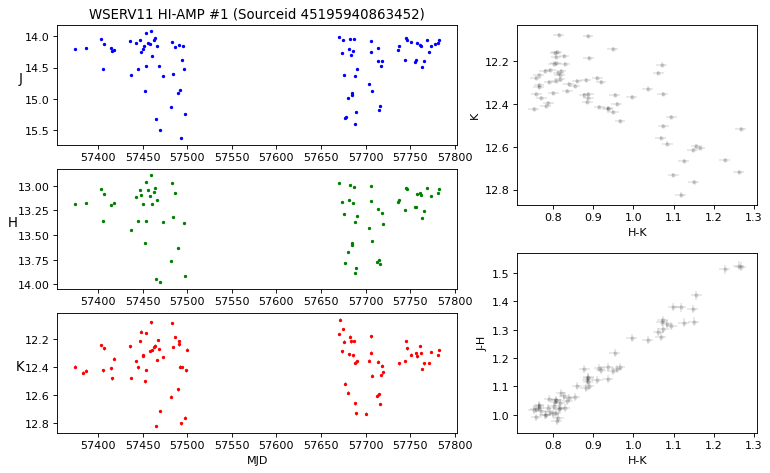

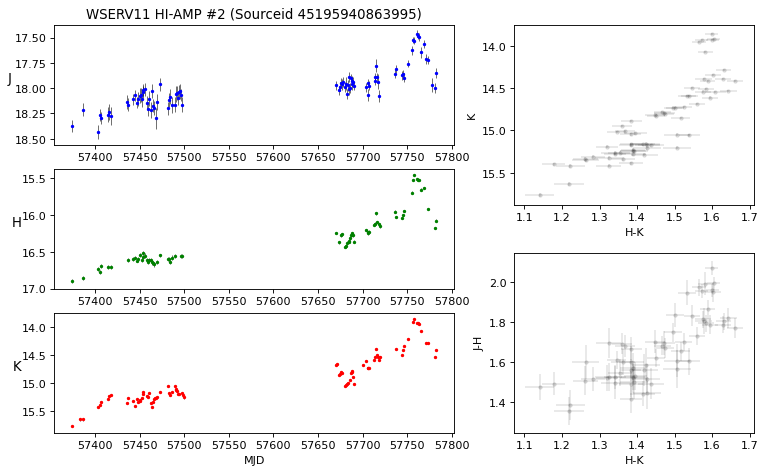

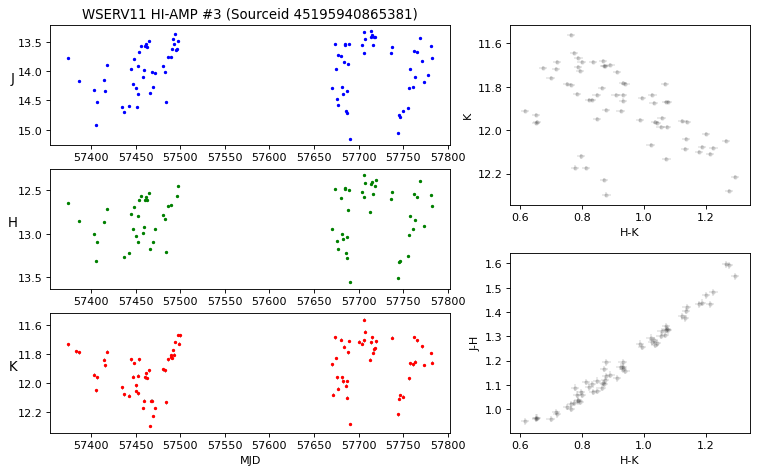

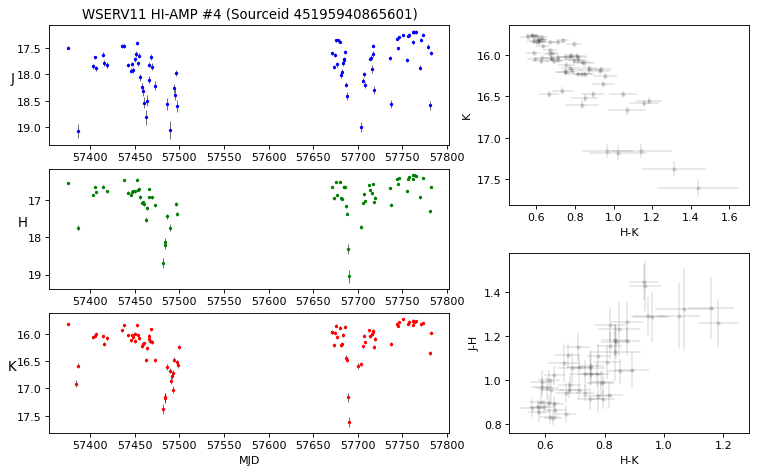

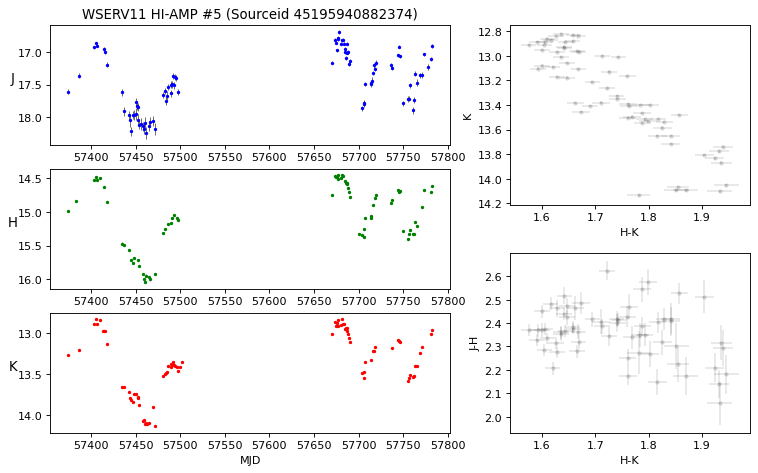

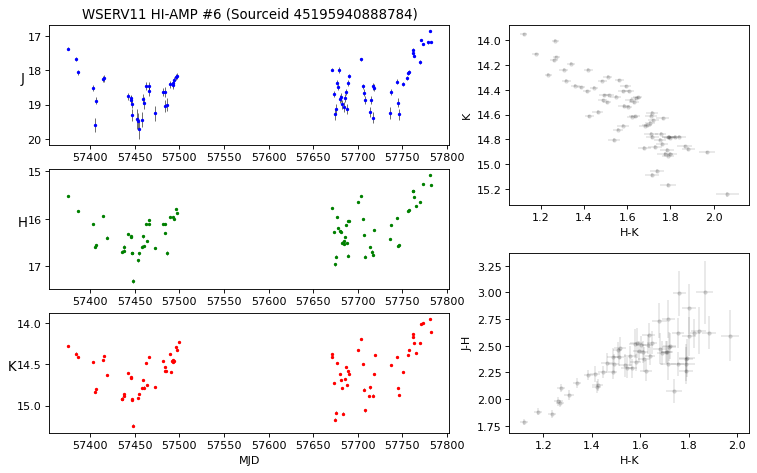

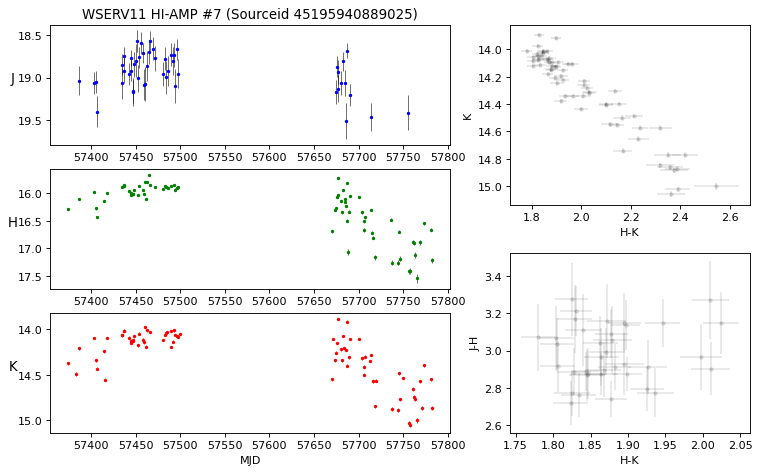

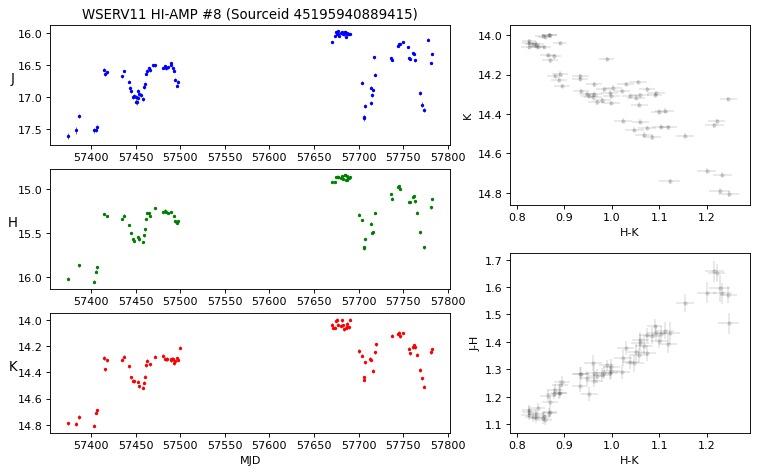

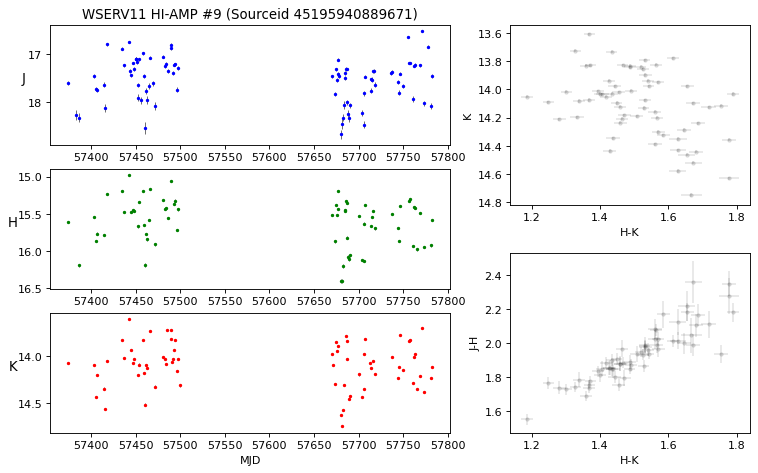

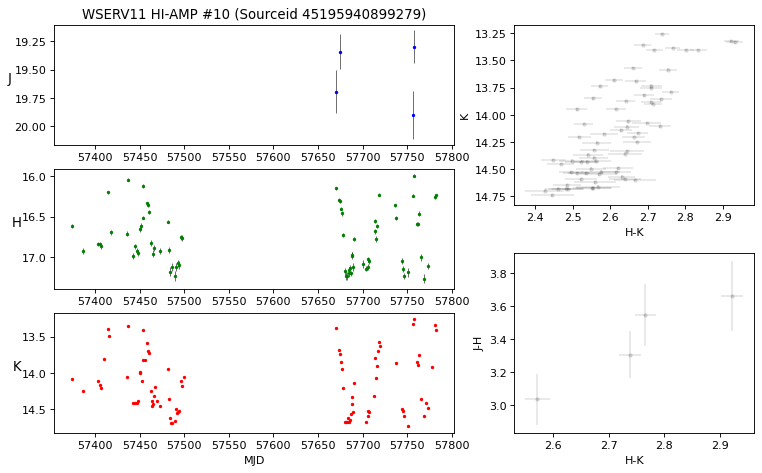

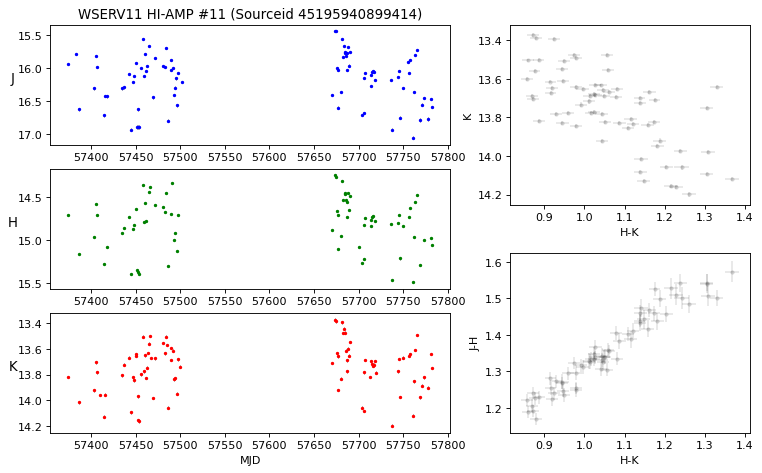

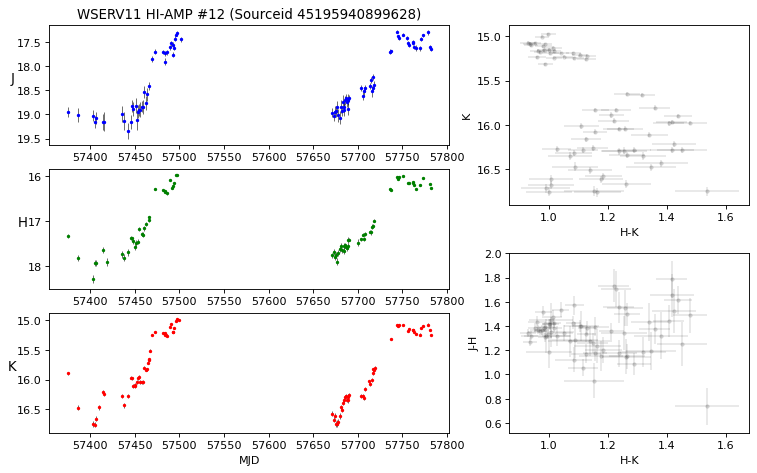

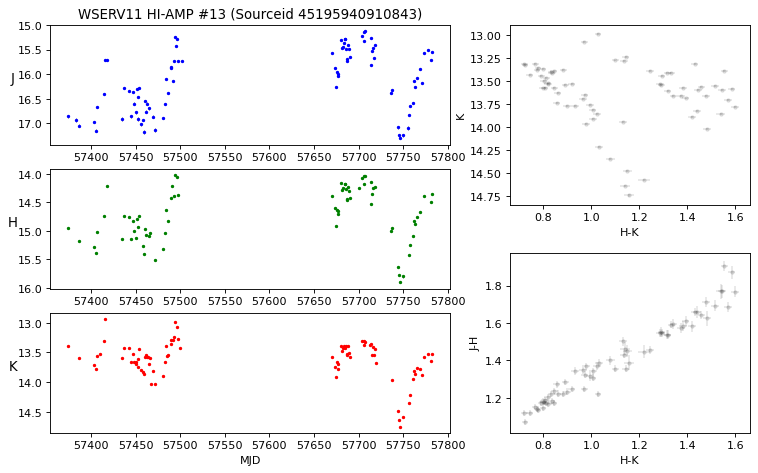

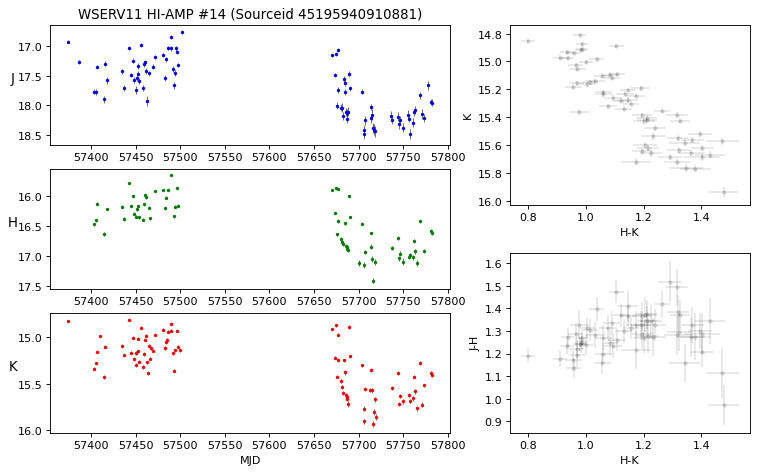

In [66]:
from wuvars.plotting.lightcurve import simple_lc

for wserv, n_min, n_max, S in list(zip(wserv_ids, n_min_list, n_max_list, min_Stetson_list)):
    
    ds = spread[f'wserv{wserv}']
    dat = phot_grouped[f'wserv{wserv}']

    q0 = sq0(ds, n_min, n_max)
    q1 = sq1(ds, n_min, n_max)
    q2 = sq2(ds, n_min, n_max)
    
    v0 = sq0_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v1 = sq1_variables(ds, n_min, n_max, Stetson_cutoff=S)
    v2 = sq2_variables(ds, n_min, n_max, Stetson_cutoff=S)
    
    hi_amp = 1.0
    
    krange = ds['range_9010']['KAPERMAG3']
    hrange = ds['range_9010']['HAPERMAG3']
    jrange = ds['range_9010']['JAPERMAG3']
    
    # high-amps
    ha = v1 & ((jrange > hi_amp) | (hrange > hi_amp) | (krange > hi_amp))

    sourceids = ds[v1 & ha].index
    
    print("\n"*5)
    print(f"WSERV{wserv} has {np.sum(ha)} high-amplitude variables (>{hi_amp} mag)")
    
    map_fig, map_ax = plt.subplots(figsize=(6,6))
    map_ax.plot(np.degrees(ds[q0]['mean']['RA']), np.degrees(ds[q0]['mean']['DEC']), 'k,', alpha=0.1)
    map_ax.plot(np.degrees(ds[v1]['mean']['RA']), np.degrees(ds[v1]['mean']['DEC']), 'r.', ms=2)
    map_ax.plot(np.degrees(ds[ha]['mean']['RA']), np.degrees(ds[ha]['mean']['DEC']), 'm*', markeredgecolor='w', ms=20)
    
    map_ax.invert_xaxis()
    map_ax.set_title(f"WSERV{wserv} ({SFR_dict[wserv]}) High Amplitude Variables")
    map_ax.set_xlabel("R.A. (deg)")
    map_ax.set_ylabel("Decl. (deg)")

    for i, sid in enumerate(sourceids):
    
        fig_lc = simple_lc(dat, sid)
        fig_lc.ax_j.set_title(f"WSERV{wserv} HI-AMP #{i} (Sourceid {sid})")

        fig_lc.savefig(f"HA_lcs_v1/WSERV{wserv}_HA{i}_sid{sid}.png")

        
    plt.show()
